<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/ProjectoFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score
figure(figsize=(1, 1), dpi=80)

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [119]:
data = pd.read_csv("/content/drive/MyDrive/Presentaciones/default_cards.csv")
data.rename({'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'},axis = 1,inplace = True)
data = data[(data['EDUCATION'] != 0) & (data['EDUCATION'] != 5) & (data['EDUCATION'] != 6) & (data['MARRIAGE'] != 0) ]
data = data.drop("ID", 1)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score), 
           'roc_auc': make_scorer(roc_auc_score)
           }

sc = prep.StandardScaler()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
Y = data["DEFAULT"]
X = data.copy()

# X = pd.get_dummies(X,columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X.drop(["DEFAULT"], inplace=True, axis=1)
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

# Part 3 Sampling

## Random over-sampling + Random under-sampling 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
59/59 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.6050
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6522
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6897
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6993
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7013
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7039
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7015
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7021
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7041
Epoch 10/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7064
Epoch 11/

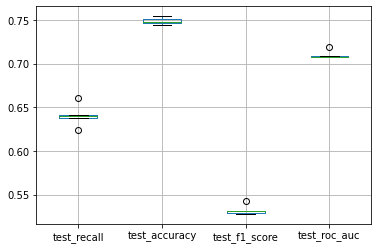

In [4]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=18, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


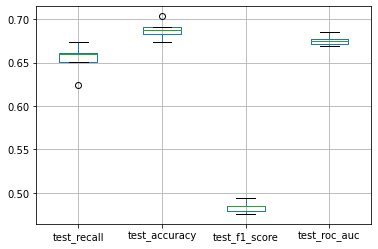

In [5]:
## LR
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

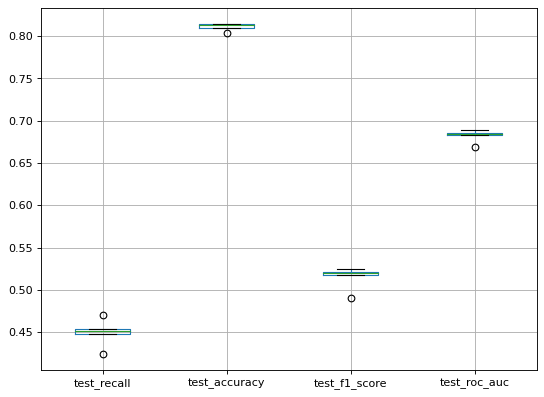

In [6]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', rf)]
pipeline = Pipeline(steps=steps)

clf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(clf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

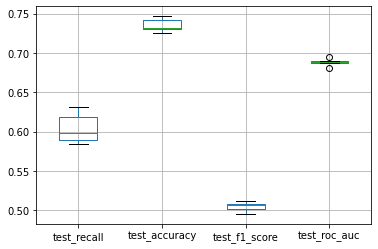

In [7]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


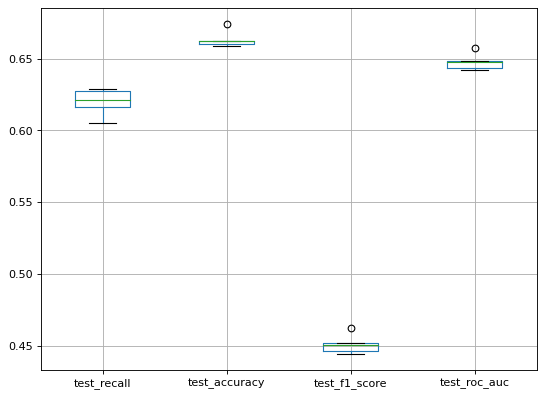

In [8]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

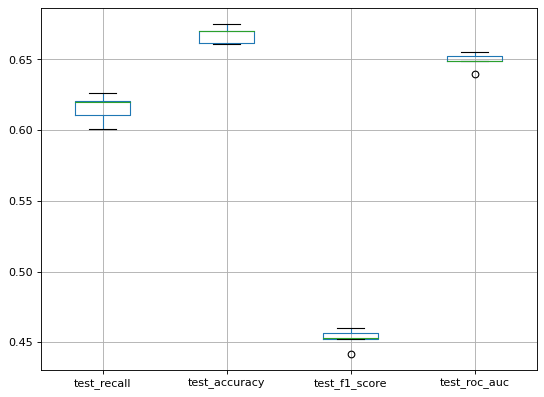

In [9]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

In [10]:
Xx, Yy = RandomOverSampler().fit_resample(X, Y)
Xx, Yy = RandomUnderSampler().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)

trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [11]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.6848 - accuracy: 0.5853 - val_loss: 0.6756 - val_accuracy: 0.6474
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6189 - val_loss: 0.6612 - val_accuracy: 0.6547
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.6415 - val_loss: 0.6484 - val_accuracy: 0.6582
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6473 - accuracy: 0.6479 - val_loss: 0.6371 - val_accuracy: 0.6615
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.6563 - val_loss: 0.6272 - val_accuracy: 0.6656
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6302 - accuracy: 0.6644 - val_loss: 0.6177 - val_accuracy: 0.6741
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6226 - accuracy: 0.6759 - val_loss: 0.6102 - val_accuracy: 0.6824
Epoch 8/100


In [12]:
print(ann_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                380       
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [14]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1293
           1       0.69      0.62      0.65      1349

    accuracy                           0.66      2642
   macro avg       0.67      0.66      0.66      2642
weighted avg       0.67      0.66      0.66      2642



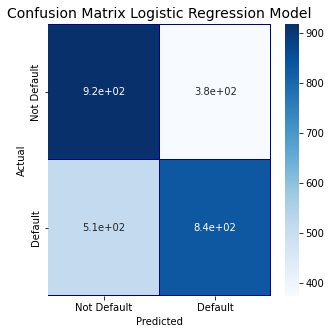

In [15]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [17]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      1293
           1       0.79      0.52      0.63      1349

    accuracy                           0.68      2642
   macro avg       0.71      0.69      0.68      2642
weighted avg       0.71      0.68      0.67      2642



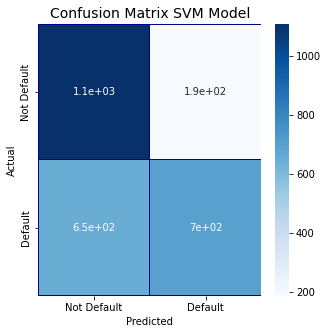

In [18]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [20]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1293
           1       0.74      0.63      0.68      1349

    accuracy                           0.70      2642
   macro avg       0.70      0.70      0.70      2642
weighted avg       0.70      0.70      0.70      2642



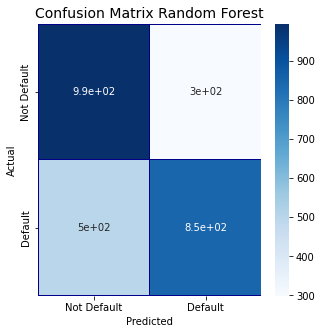

In [21]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

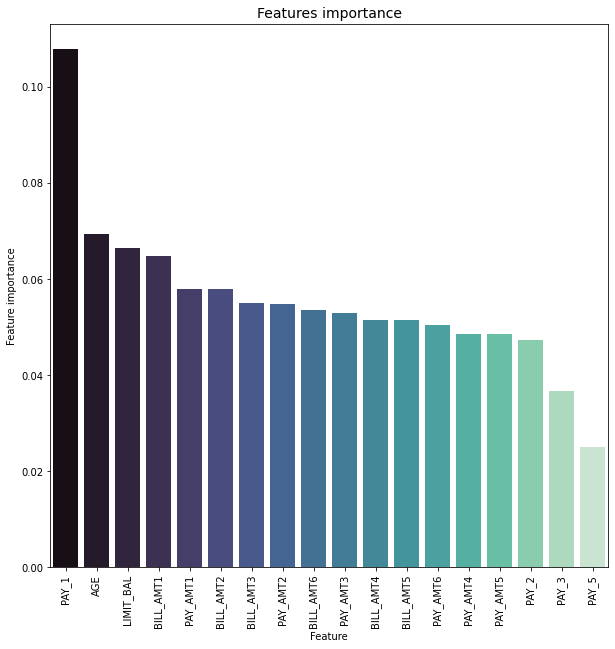

In [22]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [23]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [24]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1293
           1       0.70      0.65      0.67      1349

    accuracy                           0.68      2642
   macro avg       0.68      0.68      0.68      2642
weighted avg       0.68      0.68      0.68      2642



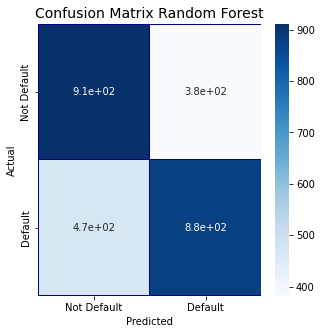

In [25]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [27]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1293
           1       0.76      0.57      0.65      1349

    accuracy                           0.69      2642
   macro avg       0.70      0.69      0.69      2642
weighted avg       0.71      0.69      0.69      2642



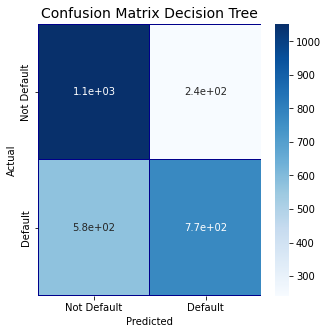

In [28]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

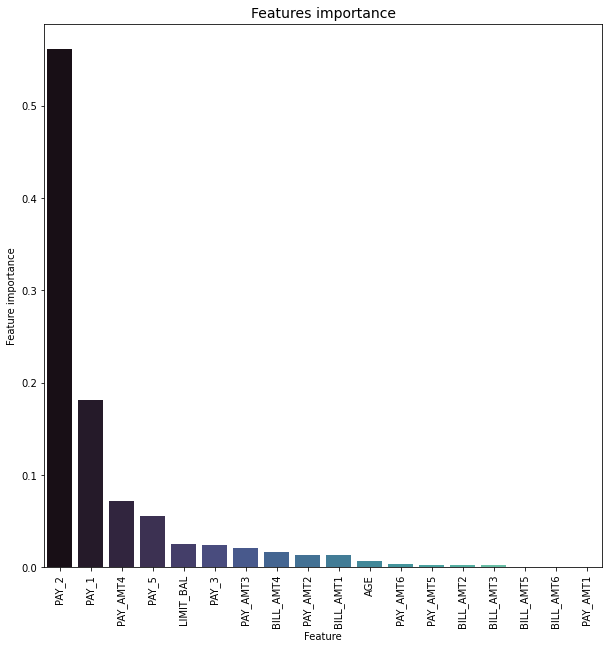

In [29]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [30]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



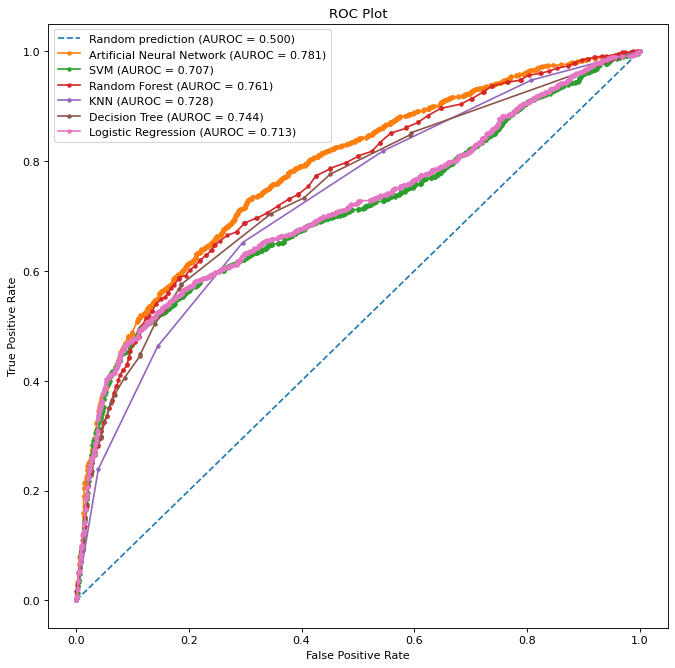

In [31]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Smote + Random under-sampling 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.6836 - accuracy: 0.5638 - mse: 0.2452 - mae: 0.4938
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6218 - mse: 0.2331 - mae: 0.4764
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6490 - mse: 0.2229 - mae: 0.4575
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6677 - mse: 0.2137 - mae: 0.4389
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6833 - mse: 0.2088 - mae: 0.4267
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6915 - mse: 0.2063 - mae: 0.4198
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6925 - mse: 0.2044 - mae: 0.4149
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6931 - mse: 0.203

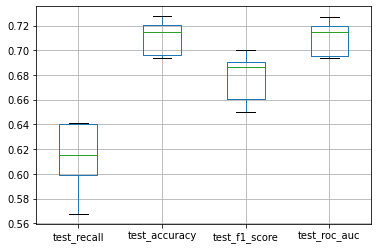

In [32]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=18, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


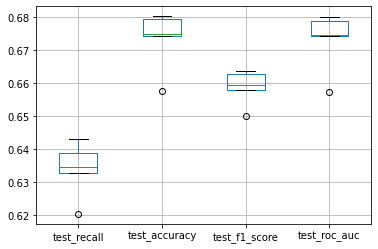

In [33]:
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

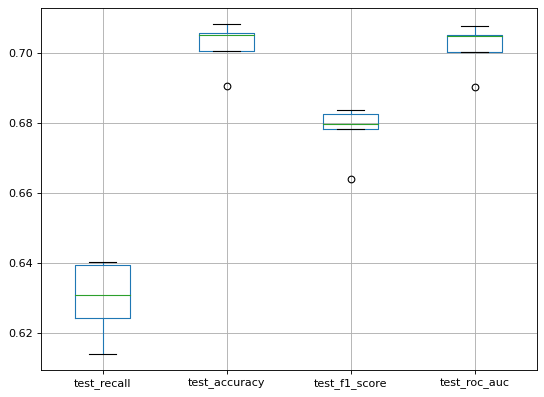

In [34]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', rf)]
pipeline = Pipeline(steps=steps)

clf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(clf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

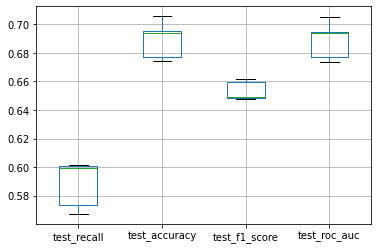

In [35]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


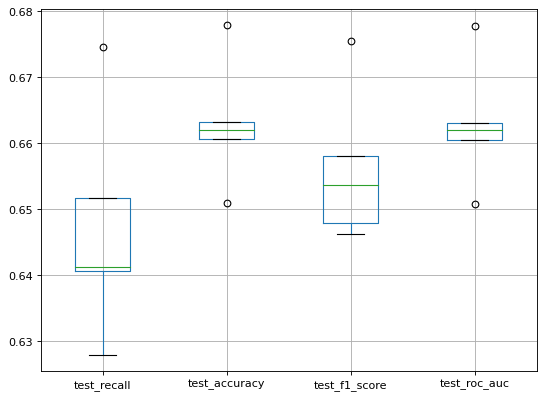

In [36]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

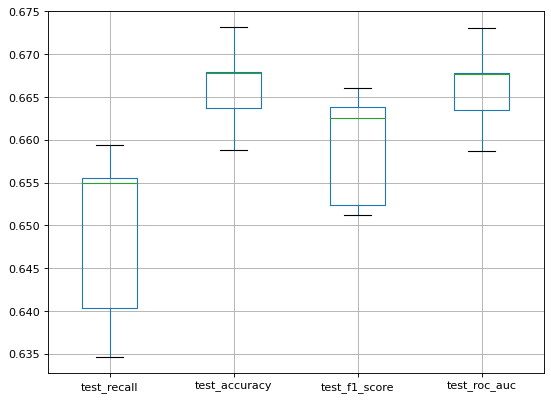

In [37]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

In [38]:
Xx, Yy = SMOTE().fit_resample(X, Y)
Xx, Yy = RandomUnderSampler().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [39]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.6915 - accuracy: 0.5221 - mse: 0.2492 - mae: 0.4989 - val_loss: 0.6851 - val_accuracy: 0.6031 - val_mse: 0.2460 - val_mae: 0.4957
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.5997 - mse: 0.2434 - mae: 0.4924 - val_loss: 0.6725 - val_accuracy: 0.6244 - val_mse: 0.2397 - val_mae: 0.4882
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.6136 - mse: 0.2377 - mae: 0.4847 - val_loss: 0.6592 - val_accuracy: 0.6303 - val_mse: 0.2333 - val_mae: 0.4792
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6418 - mse: 0.2304 - mae: 0.4737 - val_loss: 0.6461 - val_accuracy: 0.6377 - val_mse: 0.2271 - val_mae: 0.4688
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6383 - mse: 0.2254 - mae: 0.4638 - val_loss: 0.6333 - val_accuracy: 0.6469 - val_mse:

In [40]:
print(ann_model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                380       
                                                                 
 dropout_22 (Dropout)        (None, 20)                0         
                                                                 
 dense_34 (Dense)            (None, 10)                210       
                                                                 
 dropout_23 (Dropout)        (None, 10)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [42]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1330
           1       0.69      0.68      0.68      1312

    accuracy                           0.69      2642
   macro avg       0.69      0.69      0.69      2642
weighted avg       0.69      0.69      0.69      2642



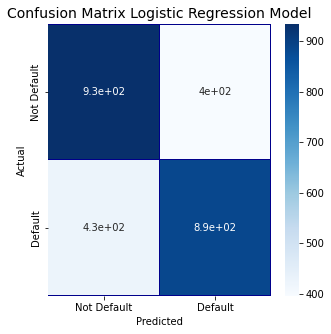

In [43]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [45]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1330
           1       0.77      0.52      0.62      1312

    accuracy                           0.69      2642
   macro avg       0.71      0.68      0.68      2642
weighted avg       0.71      0.69      0.68      2642



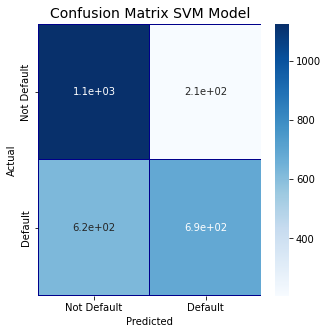

In [46]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [48]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      1330
           1       0.73      0.65      0.69      1312

    accuracy                           0.71      2642
   macro avg       0.71      0.71      0.71      2642
weighted avg       0.71      0.71      0.71      2642



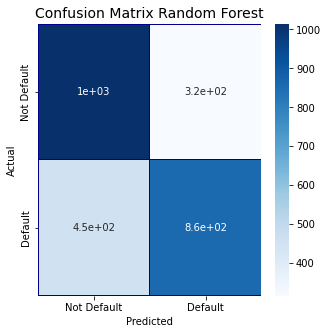

In [49]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

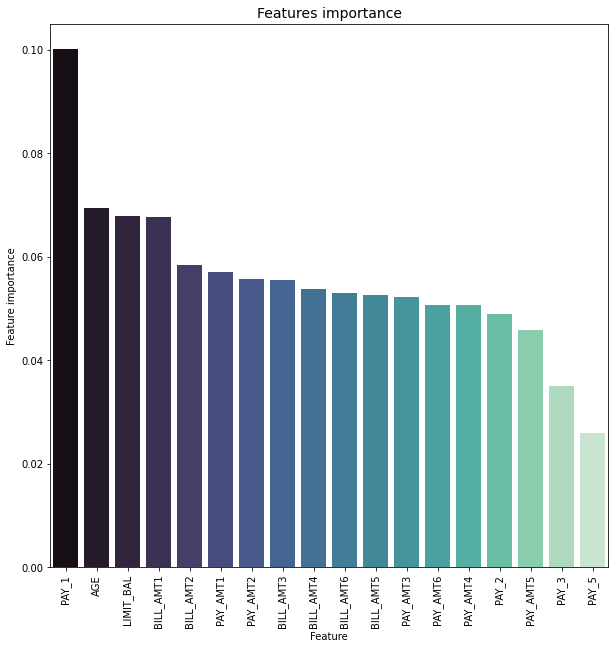

In [50]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [51]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [52]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1330
           1       0.68      0.69      0.69      1312

    accuracy                           0.69      2642
   macro avg       0.69      0.69      0.69      2642
weighted avg       0.69      0.69      0.69      2642



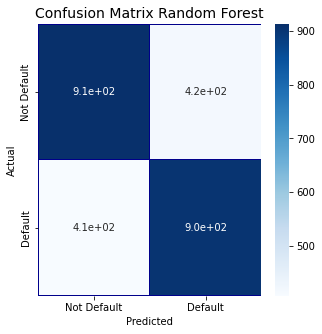

In [53]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [55]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1330
           1       0.69      0.69      0.69      1312

    accuracy                           0.69      2642
   macro avg       0.69      0.69      0.69      2642
weighted avg       0.69      0.69      0.69      2642



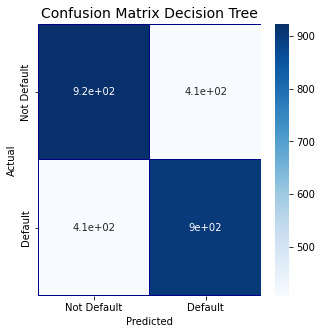

In [56]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

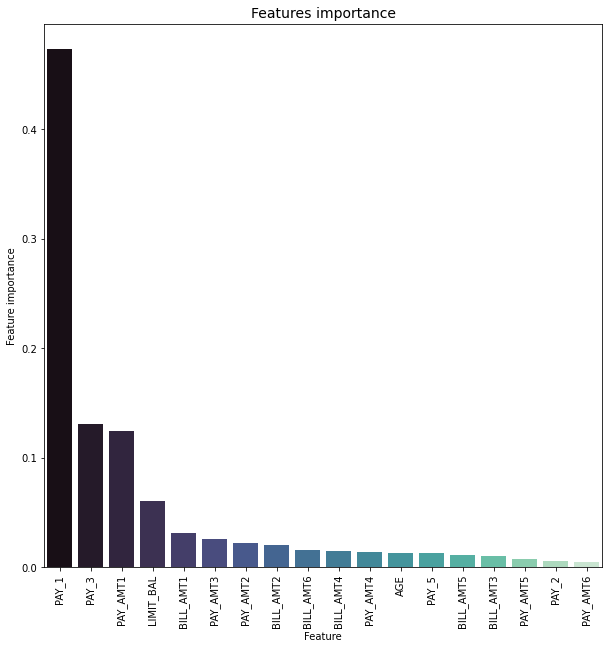

In [57]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [58]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



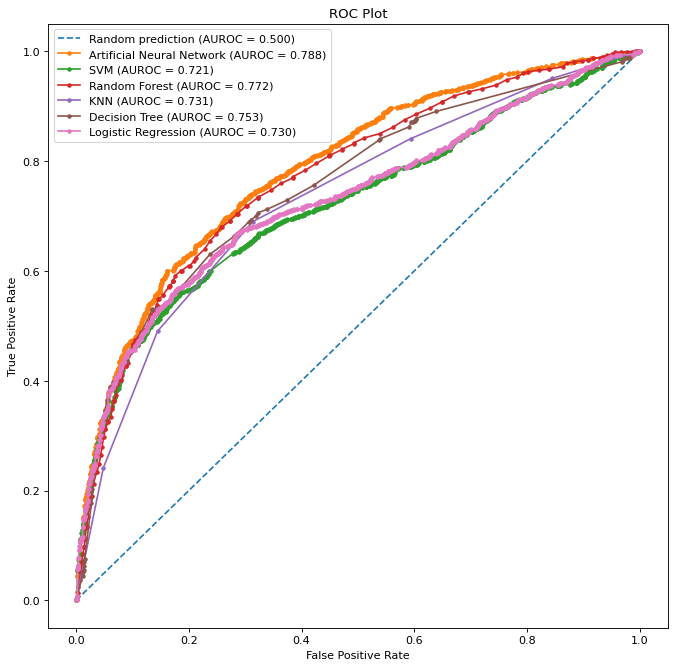

In [59]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Random over-sampling + TomeKlinks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6857 - accuracy: 0.5745 - mse: 0.2463 - mae: 0.4955
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6648 - mse: 0.2343 - mae: 0.4801
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6886 - mse: 0.2243 - mae: 0.4628
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6992 - mse: 0.2145 - mae: 0.4439
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7074 - mse: 0.2079 - mae: 0.4287
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7126 - mse: 0.2053 - mae: 0.4195
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.7174 - mse: 0.2014 - mae: 0.4120
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7211 - mse: 0.199

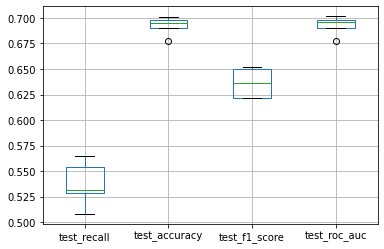

In [60]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=18, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


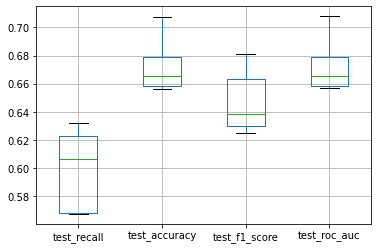

In [61]:
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

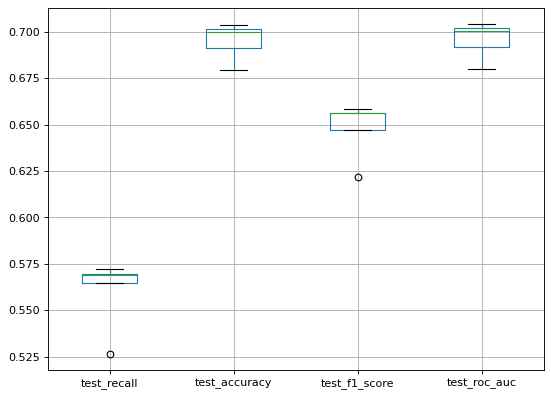

In [62]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', rf)]
pipeline = Pipeline(steps=steps)

clf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(clf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

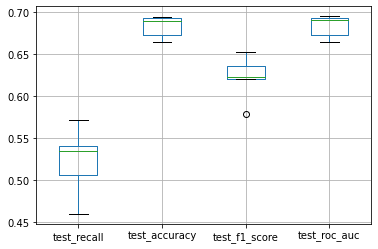

In [63]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


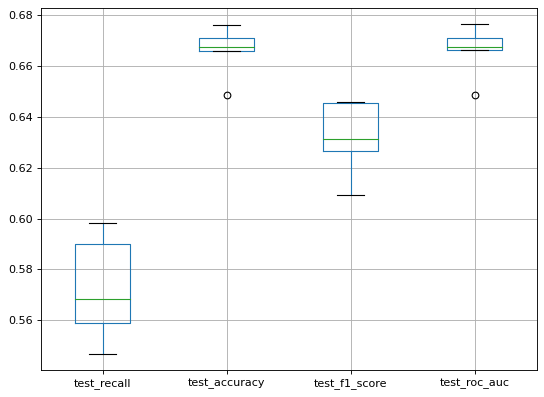

In [64]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

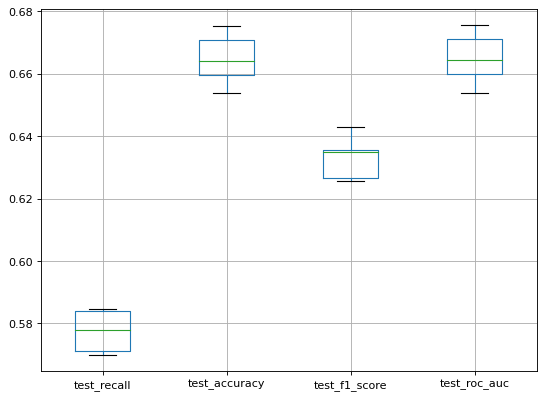

In [65]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

In [66]:
Xx, Yy = SMOTE().fit_resample(X, Y)
Xx, Yy = TomekLinks().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [67]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
27/27 [==============================] - 1s 11ms/step - loss: 0.6843 - accuracy: 0.6630 - mse: 0.2456 - mae: 0.4953 - val_loss: 0.6659 - val_accuracy: 0.8028 - val_mse: 0.2364 - val_mae: 0.4857
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.7969 - mse: 0.2270 - mae: 0.4745 - val_loss: 0.6223 - val_accuracy: 0.8003 - val_mse: 0.2149 - val_mae: 0.4599
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6001 - accuracy: 0.8026 - mse: 0.2045 - mae: 0.4429 - val_loss: 0.5703 - val_accuracy: 0.7986 - val_mse: 0.1905 - val_mae: 0.4216
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5545 - accuracy: 0.8016 - mse: 0.1836 - mae: 0.4026 - val_loss: 0.5304 - val_accuracy: 0.8001 - val_mse: 0.1729 - val_mae: 0.3809
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5297 - accuracy: 0.8019 - mse: 0.1716 - mae: 0.3694 - val_loss: 0.5091 - val_accuracy: 0.8030 - val_mse:

In [68]:
print(ann_model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 20)                380       
                                                                 
 dropout_34 (Dropout)        (None, 20)                0         
                                                                 
 dense_52 (Dense)            (None, 10)                210       
                                                                 
 dropout_35 (Dropout)        (None, 10)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [70]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4220
           1       0.41      0.67      0.51      1351

    accuracy                           0.68      5571
   macro avg       0.64      0.68      0.64      5571
weighted avg       0.75      0.68      0.70      5571



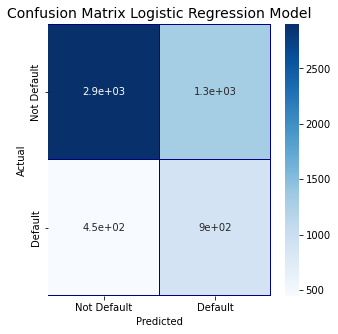

In [71]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [73]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4220
           1       0.73      0.32      0.44      1351

    accuracy                           0.81      5571
   macro avg       0.77      0.64      0.66      5571
weighted avg       0.79      0.81      0.78      5571



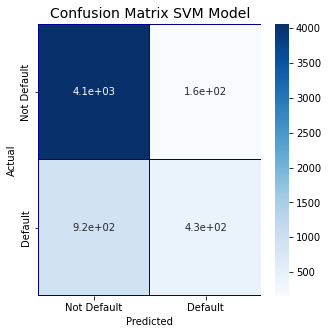

In [74]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [76]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4220
           1       0.67      0.41      0.51      1351

    accuracy                           0.81      5571
   macro avg       0.75      0.67      0.69      5571
weighted avg       0.79      0.81      0.79      5571



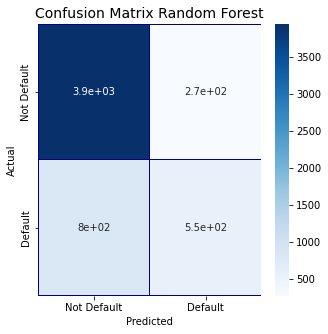

In [77]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

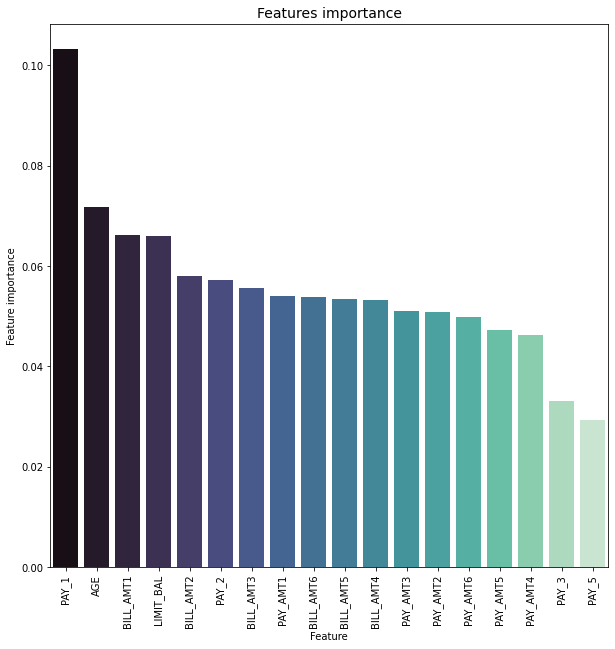

In [78]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [79]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [80]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      4220
           1       0.58      0.41      0.48      1351

    accuracy                           0.78      5571
   macro avg       0.70      0.66      0.67      5571
weighted avg       0.77      0.78      0.77      5571



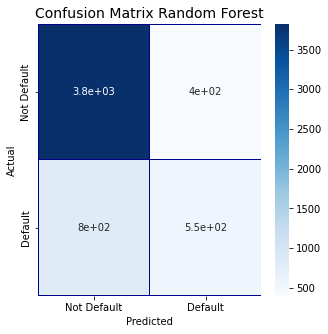

In [81]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [83]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4220
           1       0.69      0.37      0.48      1351

    accuracy                           0.81      5571
   macro avg       0.76      0.66      0.68      5571
weighted avg       0.79      0.81      0.78      5571



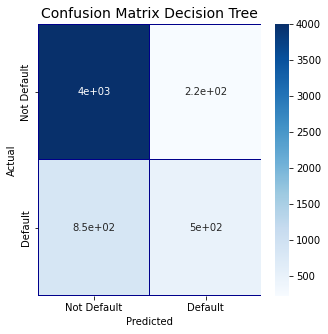

In [84]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

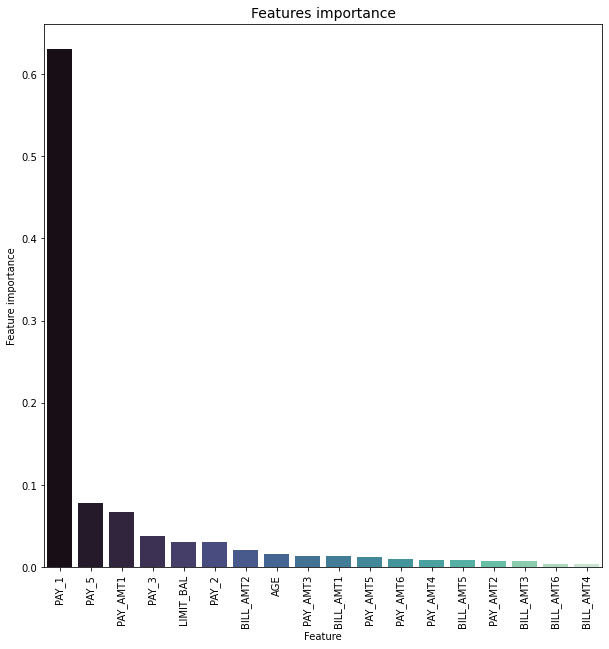

In [85]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [86]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



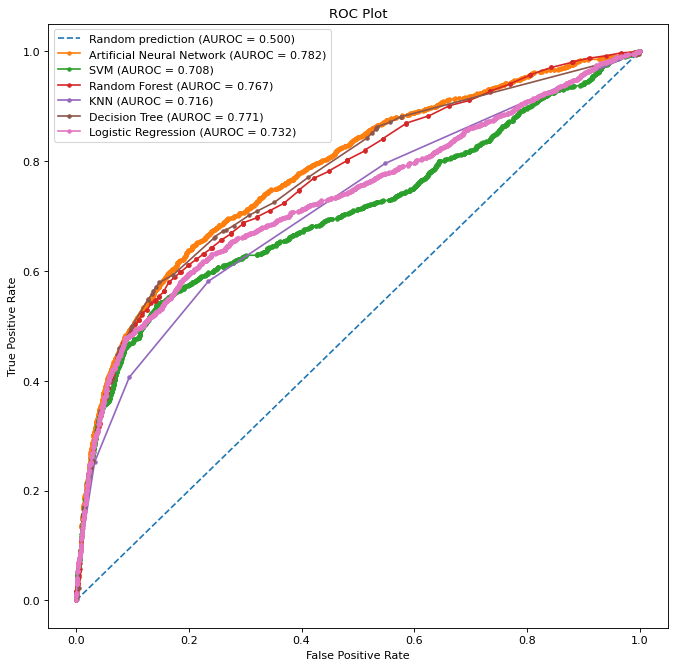

In [87]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Random over-sampling + ENN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 0.6685 - accuracy: 0.6454 - mse: 0.2378 - mae: 0.4862
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6983 - mse: 0.2043 - mae: 0.4369
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7146 - mse: 0.1813 - mae: 0.3853
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7289 - mse: 0.1716 - mae: 0.3583
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7424 - mse: 0.1650 - mae: 0.3427
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7488 - mse: 0.1604 - mae: 0.3332
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7570 - mse: 0.1563 - mae: 0.3235
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7587 - mse: 0.153

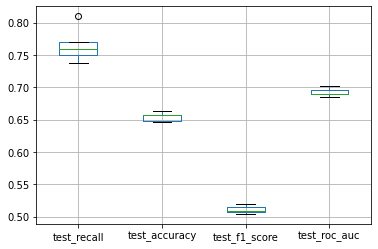

In [88]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from imblearn.combine import SMOTEENN
from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=18, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', SMOTEENN()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


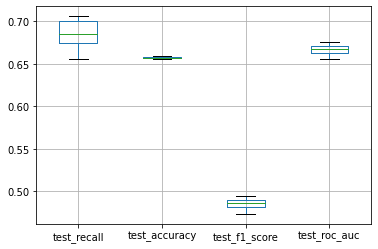

In [89]:
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', SMOTEENN()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

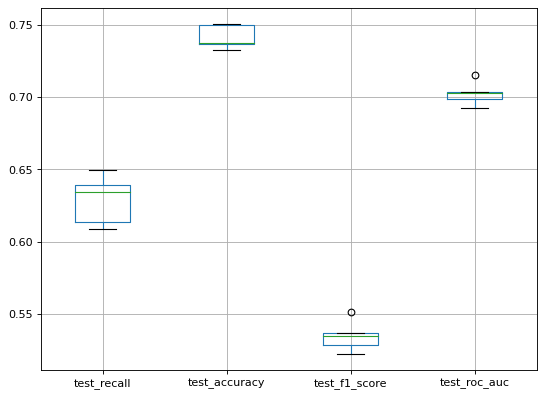

In [90]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', SMOTEENN()), ('model', rf)]
pipeline = Pipeline(steps=steps)

clf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(clf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

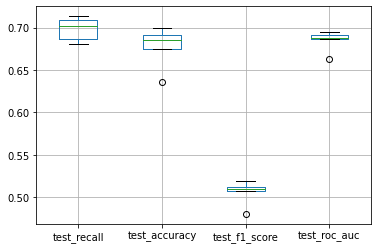

In [91]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', SMOTEENN()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


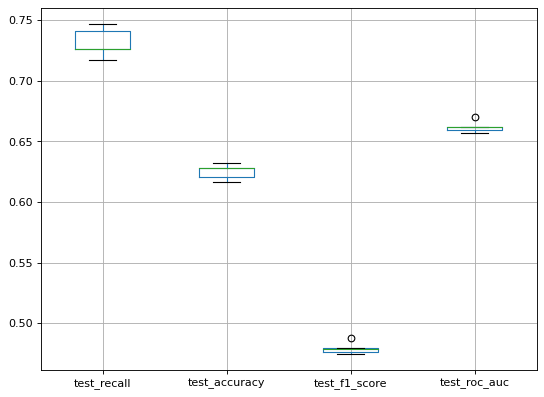

In [92]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', SMOTEENN()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

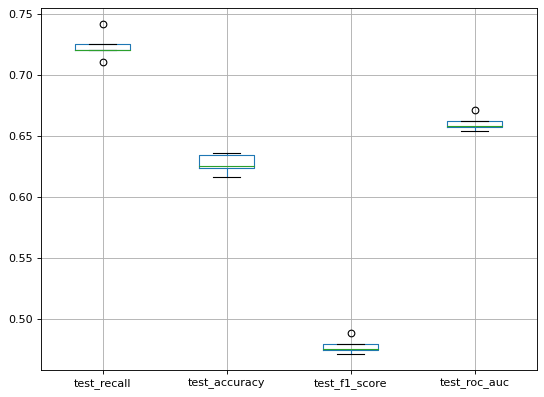

In [93]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', SMOTEENN()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

In [94]:
Xx, Yy = SMOTEENN().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [95]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 0.6584 - accuracy: 0.6634 - mse: 0.2329 - mae: 0.4801 - val_loss: 0.6189 - val_accuracy: 0.7076 - val_mse: 0.2139 - val_mae: 0.4560
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.7029 - mse: 0.2032 - mae: 0.4334 - val_loss: 0.5578 - val_accuracy: 0.7155 - val_mse: 0.1885 - val_mae: 0.4053
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.7200 - mse: 0.1865 - mae: 0.3916 - val_loss: 0.5249 - val_accuracy: 0.7265 - val_mse: 0.1765 - val_mae: 0.3702
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.7323 - mse: 0.1781 - mae: 0.3678 - val_loss: 0.5099 - val_accuracy: 0.7364 - val_mse: 0.1707 - val_mae: 0.3549
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.5177 - accuracy: 0.7418 - mse: 0.1725 - mae: 0.3554 - val_loss: 0.5001 - val_accuracy: 0.7437 - val_mse:

In [96]:
print(ann_model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 20)                380       
                                                                 
 dropout_46 (Dropout)        (None, 20)                0         
                                                                 
 dense_70 (Dense)            (None, 10)                210       
                                                                 
 dropout_47 (Dropout)        (None, 10)                0         
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [98]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      2012
           1       0.80      0.73      0.77      3358

    accuracy                           0.72      5370
   macro avg       0.71      0.72      0.71      5370
weighted avg       0.73      0.72      0.72      5370



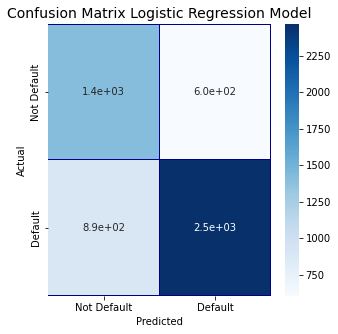

In [99]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [100]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [101]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.58      2012
           1       0.74      0.88      0.81      3358

    accuracy                           0.74      5370
   macro avg       0.73      0.69      0.70      5370
weighted avg       0.73      0.74      0.72      5370



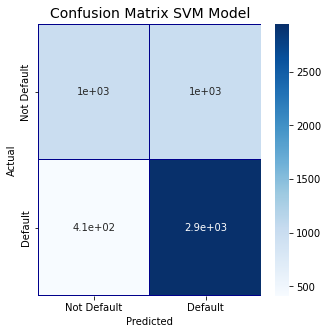

In [102]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [103]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [104]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2012
           1       0.92      0.93      0.92      3358

    accuracy                           0.90      5370
   macro avg       0.90      0.89      0.90      5370
weighted avg       0.90      0.90      0.90      5370



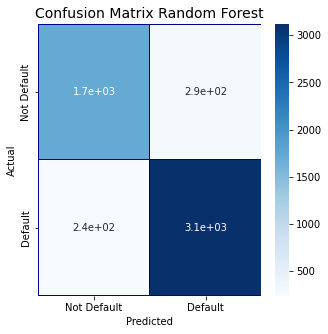

In [105]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

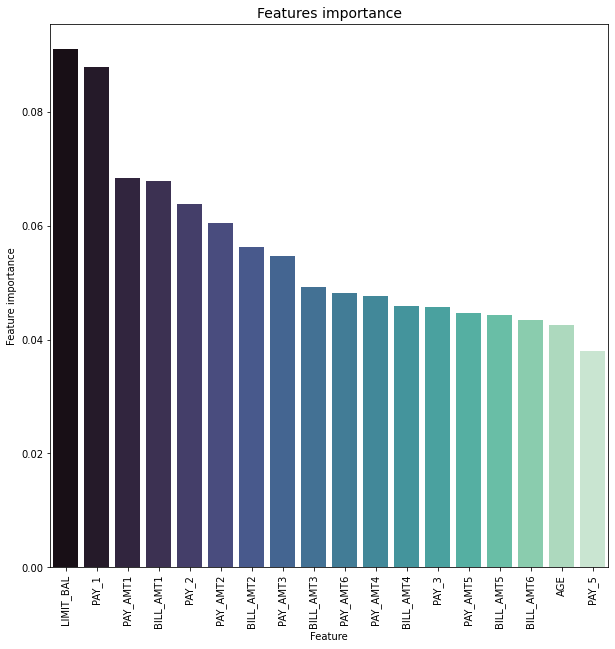

In [106]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [107]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [108]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      2012
           1       0.83      0.91      0.86      3358

    accuracy                           0.82      5370
   macro avg       0.82      0.79      0.80      5370
weighted avg       0.82      0.82      0.82      5370



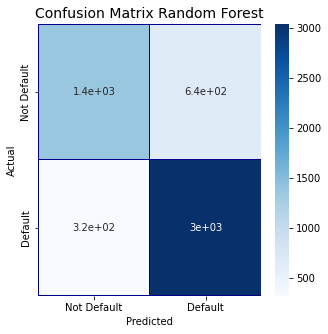

In [109]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [110]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [111]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2012
           1       0.79      0.85      0.82      3358

    accuracy                           0.77      5370
   macro avg       0.75      0.74      0.75      5370
weighted avg       0.76      0.77      0.76      5370



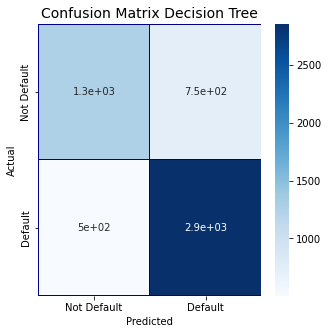

In [112]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

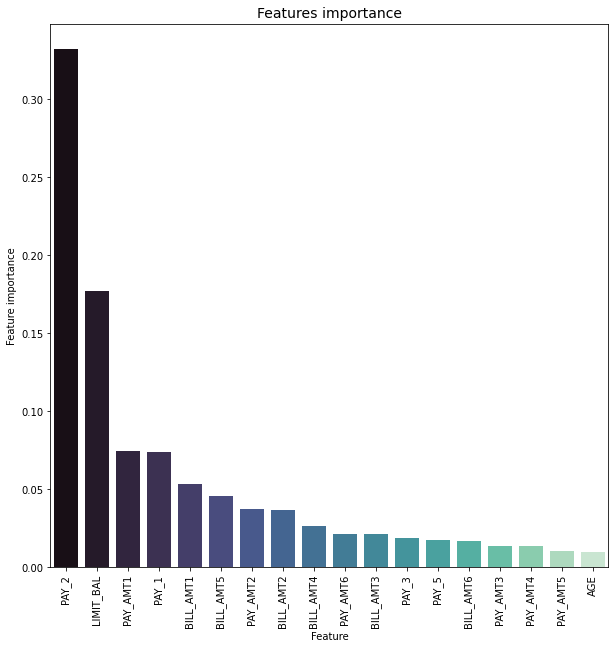

In [113]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [114]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



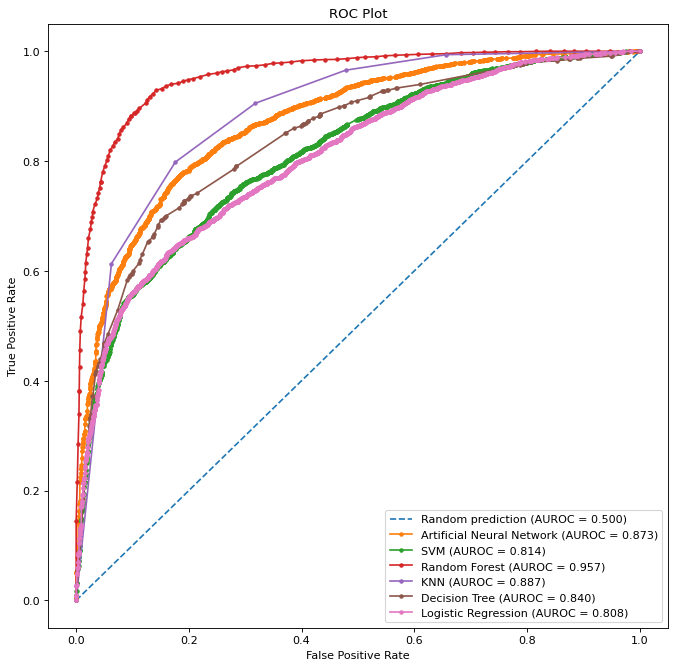

In [115]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

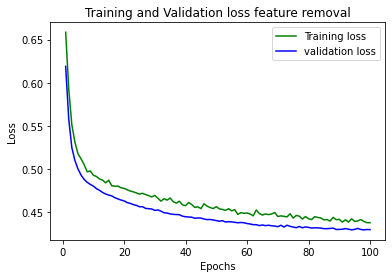

In [116]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss feature removal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

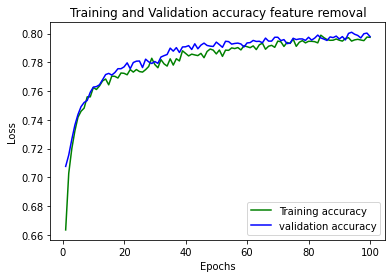

In [117]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy feature removal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

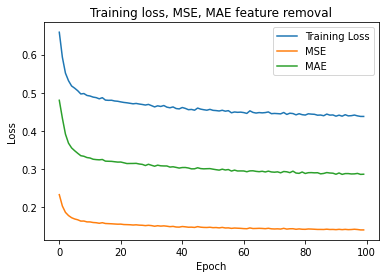

In [118]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
plt.legend(['Training Loss', 'MSE', 'MAE'])
plt.title('Training loss, MSE, MAE feature removal')
plt.xlabel('Epoch')
plt.ylabel('Loss')
pyplot.show()